In [2]:
!pdm add keras

Adding packages to default dependencies: keras
⠏ Resolving: new pin types-python-dateutil 2.9.0.20240906
🔒 Lock successful.
Changes are written to pyproject.toml.
⠋ Resolving packages from lockfile...
All packages are synced to date, nothing to do.
Installing the project as an editable package...
  ✔ Update mnist 0.4.4 -> 0.4.6 successfulBuilding...  
36m⠇ Updating mnist 0.4.4 -> 0.4.6...   
🎉 All complete!
36m⠇ Updating mnist 0.4.4 -> 0.4.6...   
INFO: PDM 2.17.1 is installed, while 2.18.2 is available.
Please run `pdm self update` to upgrade.
Run `pdm config check_update false` to disable the check.


In [322]:
from keras.datasets import mnist

In [323]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [324]:
# 인자의 맨 마지막(1)은 흰/백 설정 
# 6000개의 이미지 , 28X28 픽셀, 1개의 채널
x_train_vec = x_train.reshape((60000,28,28,1))
x_test_vec = x_test.reshape((10000,28,28,1))

print( f" x_train.shape : {x_train.shape}")
print( f" x_test.shape : {x_test.shape}")
print( f" y_train.shape : {y_train.shape}")
print( f" y_test.shape : {y_test.shape}")

print( f" x_train_vec.shape : {x_train.shape}")
print( f" x_test_vec.shape : {x_test.shape}")

 x_train.shape : (60000, 28, 28)
 x_test.shape : (10000, 28, 28)
 y_train.shape : (60000,)
 y_test.shape : (10000,)
 x_train_vec.shape : (60000, 28, 28)
 x_test_vec.shape : (10000, 28, 28)


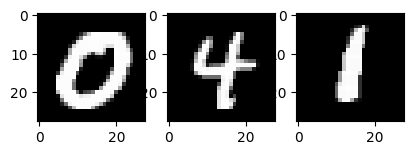

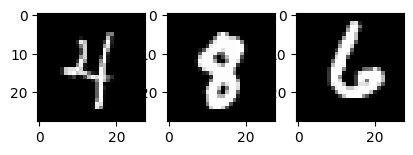

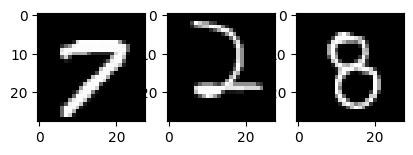

In [325]:
import matplotlib.pyplot as plt
import random

for i in range(1,4,1):
    for j in range(1,4,1):
        plt.subplot(i,4,j)
        plt.imshow(x_train[random.randint(0,60000)], cmap="gray")
    plt.show()

In [326]:
import numpy as np

def to_one_hot(labels, dimension=10):
    results = np.zeros((len(labels), dimension))
    for i,label in enumerate(labels):
        results[i,label] = 1.
    return results

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print(y_train_vec)
print(y_test_vec)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [327]:
for x in x_train[50000]:
    for i in x:
        print('{:3}'.format(i), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 47160195205 71 86 13  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 12238254254254254254227 84  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 13196176127176207236245222 23  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 20137254 95  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 78254144  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 17200254170  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 47218254216 29  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 95225254245 65  0  0  0  

In [328]:
rand_indices = np.random.permutation(60000)
rand_indices

array([42463, 44937, 53292, ..., 38233, 34207, 47586])

In [329]:
train_indices = rand_indices[0:50000]
valid_indices = rand_indices[50000:60000]

In [330]:
x_valid_vec = x_train_vec[valid_indices, :, :, :]
y_valid_vec = y_train_vec[valid_indices, :]
x_valid_vec
y_valid_vec

x_train_vec = x_train_vec[train_indices, :, :, :]
y_train_vec = y_train_vec[train_indices, :] 
x_train_vec
y_train_vec

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [331]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(filters=10, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=20, kernel_size =(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 24, 24, 10)     │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 8, 8, 20)       │         5,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        32,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,390 (149.96 KB)

 Trainable params: 38,390 (149.96 KB)

 Non-trainable params: 0 (0.00 B)

In [335]:
from keras.optimizers import RMSprop

model.compile(
    optimizer=RMSprop(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [336]:
history = model.fit(x_train_vec, y_train_vec, batch_size=128, epochs=50, 
          validation_data=(x_valid_vec, y_valid_vec)
         )

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5121 - loss: 10.4931 - val_accuracy: 0.8606 - val_loss: 0.9153
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8816 - loss: 0.7530 - val_accuracy: 0.9118 - val_loss: 0.5103
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9218 - loss: 0.4346 - val_accuracy: 0.9364 - val_loss: 0.3447
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9402 - loss: 0.2956 - val_accuracy: 0.9418 - val_loss: 0.2927
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9511 - loss: 0.2254 - val_accuracy: 0.9489 - val_loss: 0.2508
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9612 - loss: 0.1722 - val_accuracy: 0.9508 - val_loss: 0.2245
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9658 - loss: 0.1448 - val_accuracy: 0.9591 - val_loss: 0.1897
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9683 - loss: 0.1249 - val_accuracy: 0

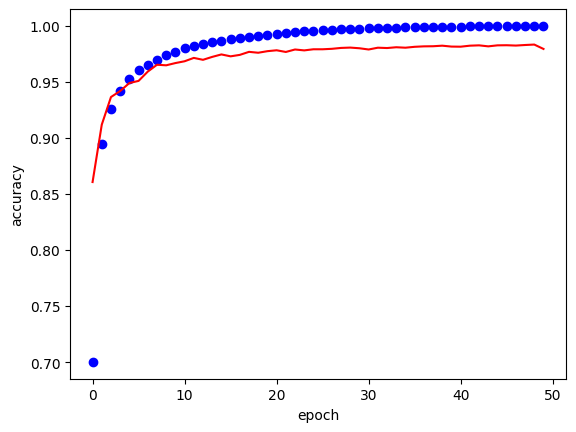

In [343]:
import matplotlib.pyplot as plt
import numpy as np

epoch = np.arange(len(history.history['accuracy']))
train_acc = history.history['accuracy']
valid_acc = history.history['val_accuracy']

plt.plot(epoch, train_acc, 'bo',label='train_acc')
plt.plot(epoch, valid_acc, 'r', label='val_acc')

plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()


In [344]:
r = model.evaluate(x_test_vec, y_test_vec)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9769 - loss: 0.1349


In [345]:
print(r)

[0.1132877916097641, 0.9800000190734863]


In [346]:
print('Loss =', str(r[0]))
print('Accuracy =', str(r[1]))

Loss = 0.1132877916097641
Accuracy = 0.9800000190734863


In [352]:
model.save('mnist984.keras')